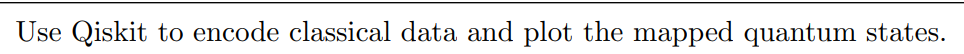

In [ ]:
!pip install qiskit qiskit-aer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

**Mapping Classical Data to Quantum Angles**
Each classical data point (x, y) is mapped into two angles:

θ (theta): controls rotation around Y-axis (RY gate).

φ (phi): controls rotation around Z-axis (RZ gate).

This is known as angle encoding or feature encoding, where numerical values are represented as rotation

In [ ]:
def map_point_to_angles(x, y):
    theta = x * np.pi
    phi = y * 2 * np.pi
    return theta, phi

**Converting Quantum Statevector to Bloch Vector**

Every single-qubit quantum state is represented as:

![image.png](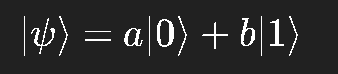
)

The Bloch vector (x, y, z) represents this state geometrically:

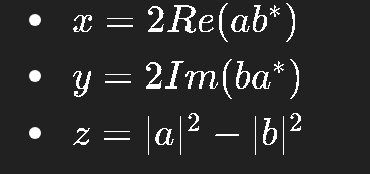

These values define a point on the Bloch sphere, where each direction corresponds to a unique quantum state.

In [ ]:
def bloch_vector_from_statevector(statevec):
    a, b = statevec[0], statevec[1]
    x = 2 * np.real(a * np.conj(b))
    y = 2 * np.imag(b * np.conj(a))
    z = np.abs(a)**2 - np.abs(b)**2
    return np.array([x, y, z])

**Classical Data Points**

This is a simple classical dataset with 5 two-dimensional points.

Each point will be encoded into a single qubit.

In [ ]:
points = [(0.1, 0.2), (0.4, 0.8), (0.7, 0.3), (1.0, 1.0), (0.5, 0.5)]


For each point (x, y):

Compute its θ and φ.

Create a single-qubit quantum circuit:

Apply RY(θ) → rotates qubit around the Y-axis.

Apply RZ(φ) → rotates qubit around the Z-axis.

Use Qiskit’s simulator to get the final statevector:
Statevector.from_instruction(qc)

This gives a 2-element complex vector [a, b] representing the state:

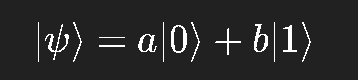

Convert that to a Bloch vector using the previous function.

At the end of this loop, you have a list of Bloch vectors (3D coordinates) — one for each data point.

In [ ]:
bloch_vectors = []
for x, y in points:
    theta, phi = map_point_to_angles(x, y)
    qc = QuantumCircuit(1)
    qc.ry(theta, 0)
    qc.rz(phi, 0)
    sv = Statevector.from_instruction(qc)
    bloch_vectors.append(bloch_vector_from_statevector(sv.data))


This section draws a 3D wireframe sphere using trigonometric functions.

This sphere represents all possible pure quantum states of one qubit.

Each Bloch vector is drawn as a red arrow from the origin to its 3D coordinate.

Labels P1, P2, … are added for clarity.

This shows how each classical data point corresponds to a unique quantum state on the Bloch sphere.

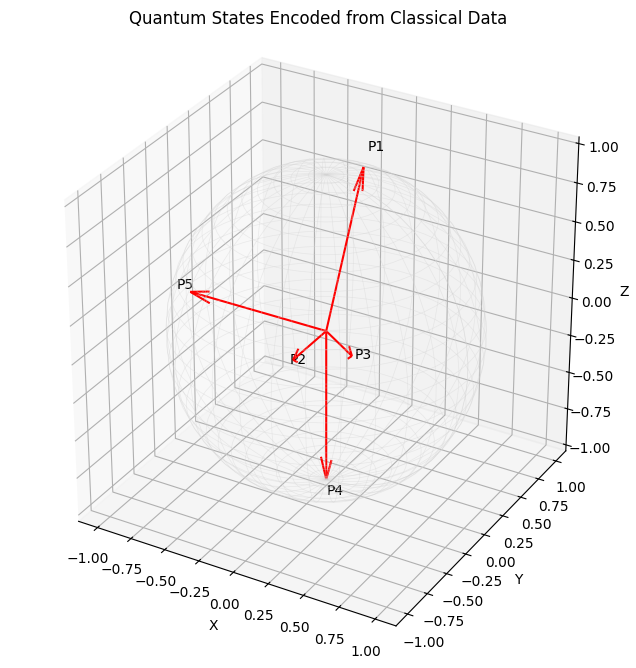

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

u, v = np.mgrid[0:2*np.pi:60j, 0:np.pi:30j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="lightgray", linewidth=0.5, alpha=0.4)
for i, bv in enumerate(bloch_vectors):
    ax.quiver(0, 0, 0, bv[0], bv[1], bv[2], color='red', arrow_length_ratio=0.15)
    ax.text(bv[0]*1.1, bv[1]*1.1, bv[2]*1.1, f"P{i+1}", color='black')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Quantum States Encoded from Classical Data")
ax.set_box_aspect([1, 1, 1])
plt.show()
